In [124]:
import importlib
import TCExtraSourceAnalysis_beta as SAn
import TCTriggerFunctions as TF
import matplotlib.pyplot as plt
import numpy as np
import LCanalyses as LCA
import LCPreset as LCP
#import scipy.optimize as opt
#import itertools as itt
import os
importlib.reload(TF)
importlib.reload(SAn)
importlib.reload(LCA)
importlib.reload(LCP)

<module 'LCPreset' from '/mnt/Secdrive/TSmain/Pip_test/trigger_codes_github/LCPreset.py'>

51


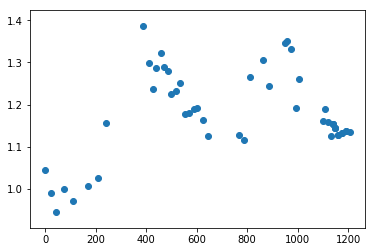

In [125]:
mod_date = "190606"
fluxes, dates, noises = LCP.JCMTTRansientSource("EC53",6,"850",mod_date)
print(len(fluxes))
plt.close()
plt.scatter(dates,fluxes)

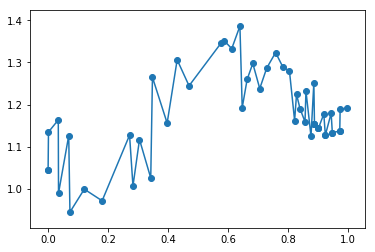

In [126]:
periods = np.linspace(1,int(dates[-1]/2),int(dates[-1]/2))
string_lengths = LCA.LCStringlength(dates,fluxes,periods])

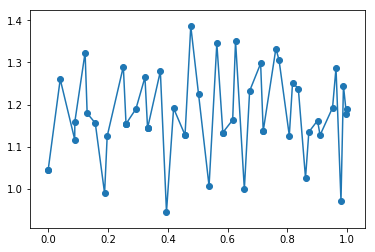

In [108]:
#def LCstringlength(dates, fluxes, periods)
delta_dates = []
string_lengths = []
periods = np.linspace(1,int(dates[-1]/2),int(dates[-1]/2))

for i in range(0,len(periods)):
    coupled = [[dates[0],fluxes[0]]]
    phased_dates = [x%periods[i] for x in dates]
    
    for j in range(0,len(phased_dates)):
        coupled.append([phased_dates[j],fluxes[j]])
    coupled.sort(key=lambda coupled: coupled[0])
    s_fluxes = [x[1] for x in coupled]
    s_phase = [x[0]/periods[i] for x in coupled]
    string_length = 0
    for k in range(1,len(s_fluxes)):
        delta_phase = s_phase[k] - s_phase[k-1]
        delta_flux = s_fluxes[k] - s_fluxes[k-1]
        string_length = string_length + np.sqrt(delta_phase**2 + delta_flux**2)
    string_lengths.append(string_length)
    if i == 110:
        plt.scatter(s_phase, s_fluxes)
        plt.plot(s_phase,s_fluxes)
    



572.0

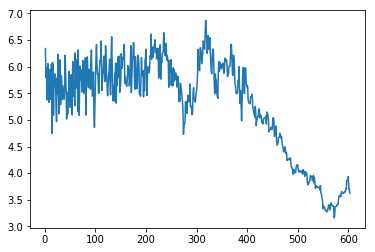

In [122]:
plt.close()
plt.plot(all_period,string_lengths)
a = np.array(string_lengths)
all_period[np.where(a == a.min())][0]